### Pandas Timeseries

Used for storing events/data that fits on a timeline.

- Weather data
- Temperature readings
- Heart rate monitoring (EKG)
- Quarterly sales
- Stock prices

In [1]:
import pandas as pd
import numpy as np

### Create a datetimeindex

Use date_range() with 3 of the 4 parameters:

- start
- end
- periods
- freq

In [2]:
datetimeindex = pd.date_range(start='2018-01-01', end='2019-12-31', freq="D")
datetimeindex

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [3]:
df = pd.DataFrame(
    dict(
        n = range(len(datetimeindex)),
        rand = np.random.random(len(datetimeindex))
    ),
    index=datetimeindex
)

df

,n,rand
2018-01-01,0,0.757499
2018-01-02,1,0.631548
2018-01-03,2,0.181168
2018-01-04,3,0.556692
2018-01-05,4,0.333947
...,...,...
2019-12-27,725,0.835067
2019-12-28,726,0.431712
2019-12-29,727,0.029676
2019-12-30,728,0.839177


In [4]:
df.loc["2018-03-15"]
df.loc[:"2018-03-15"]
df.loc["2018-03-15":"2018-03-20"]
df.loc["2018-03"]
df.loc["2019"]
df.loc["2019-03-29":"2019-05"]

,n,rand
2019-03-29,452,0.097846
2019-03-30,453,0.030263
2019-03-31,454,0.459034
2019-04-01,455,0.517900
2019-04-02,456,0.061324
...,...,...
2019-05-27,511,0.435591
2019-05-28,512,0.526028
2019-05-29,513,0.841572
2019-05-30,514,0.363698


## Resampling
Resampling is the practice of creating new samples with a lower or higher frequency than the original data.

#### Downsampling
When the sample frequency is lower than the original we can aggregate values from the original data.

In [5]:
from helpers import hdisplay

resample_method = "6H"

hdisplay([
    df.head(10),
    df.resample(resample_method).agg({"n": "max", "rand": "sum"}).head(10)],
    ["Original", f"Resampled using '{resample_method}'"]    
)

,n,rand
2018-01-01 00:00:00,0,0.757499
2018-01-02 00:00:00,1,0.631548
2018-01-03 00:00:00,2,0.181168
2018-01-04 00:00:00,3,0.556692
2018-01-05 00:00:00,4,0.333947
2018-01-06 00:00:00,5,0.894049
2018-01-07 00:00:00,6,0.149259
2018-01-08 00:00:00,7,0.869720
2018-01-09 00:00:00,8,0.189774
2018-01-10 00:00:00,9,0.918726


#### Upsampling
When the sample frequency is higher than the original we can aggregate values from the original data.

- ffill
- bfill
- nearest
- interpolation
- fillna

In [6]:
from helpers import hdisplay

resample_method = "6H"

hdisplay([
    df.head(10),
    df.resample(resample_method).max().fillna(df[["n", "rand"]].median()).head(10)],
    ["Original", f"Resampled using '{resample_method}'"]    
)

,n,rand
2018-01-01 00:00:00,0,0.757499
2018-01-02 00:00:00,1,0.631548
2018-01-03 00:00:00,2,0.181168
2018-01-04 00:00:00,3,0.556692
2018-01-05 00:00:00,4,0.333947
2018-01-06 00:00:00,5,0.894049
2018-01-07 00:00:00,6,0.149259
2018-01-08 00:00:00,7,0.869720
2018-01-09 00:00:00,8,0.189774
2018-01-10 00:00:00,9,0.918726


## Working with real data

In [7]:
apple = pd.read_csv("../Data/HistoricalData_Apple.csv", parse_dates=["Date"], index_col="Date")
apple.rename(columns={"Close/Last": "Close"}, inplace=True)

to_int_columns = ["Close", "Open", "High", "Low"]

apple[["Close", "Open", "High", "Low"]] = apple[["Close", "Open", "High", "Low"]].map(lambda value: value.replace("$", "")).astype("float64")

# apple = apple.astype({col: "float64" for col in to_int_columns})

apple.sort_index(inplace=True)

apple

,Close,Volume,Open,High,Low
Date,,,,,
2013-11-11,18.5374,226990197,18.5711,18.6311,18.3718
2013-11-12,18.5718,204271118,18.4882,18.7114,18.4643
2013-11-13,18.5941,196615949,18.5000,18.6518,18.4629
2013-11-14,18.8629,281606247,18.6718,18.9029,18.6382
2013-11-15,18.7497,317359713,18.8064,18.8961,18.7318
...,...,...,...,...,...
2023-11-03,176.6500,79829250,174.2400,176.8200,173.3500
2023-11-06,179.2300,63841310,176.3800,179.4300,176.2100
2023-11-07,181.8200,70529970,179.1800,182.4400,178.9700


In [9]:
# pd.set_option("display.float_format", '{:.2f}'.format)
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

apple.loc["2018", "Close"].mean()
apple.resample("Y").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-12-31,19.51,305.95M,19.50,19.65,19.38
2014-12-31,23.07,251.68M,23.05,23.25,22.87
2015-12-31,30.01,206.59M,30.04,30.31,29.72
2016-12-31,26.15,153.07M,26.13,26.36,25.92
2017-12-31,37.64,108.01M,37.61,37.85,37.37
2018-12-31,47.26,135.07M,47.28,47.75,46.80
2019-12-31,52.06,112.24M,51.97,52.46,51.57
2020-12-31,95.35,157.62M,95.27,96.66,93.91
2021-12-31,140.99,90.54M,140.86,142.35,139.47


<Axes: xlabel='Date', ylabel='Open'>

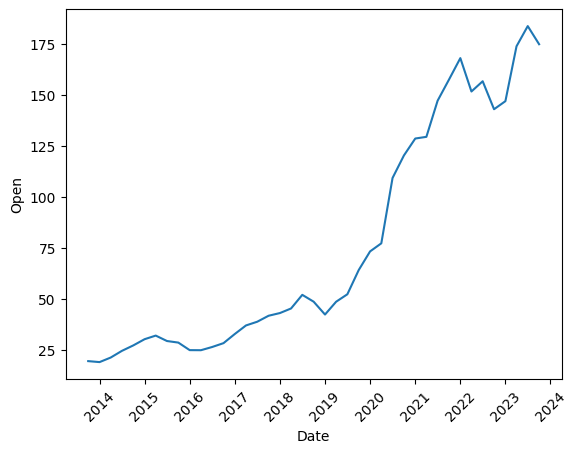

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data = apple.loc["2020-10"]
data = apple.loc["2020"].resample("M").mean()
data = apple.resample("QS").mean()
plt.xticks(rotation=45)
sns.lineplot(data=data, x=data.index, y="Open")